# FFT

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

## Principes de la FFT avec Python et numpy

Soit un signal discret $x(n.T_E)$ avec une période d'échantillonage $T_E$ comprenant N points. La durée du signal est $T_{FFT}=N.T_E$ et la fréquence d'échantillonnage est $f_E=\displaystyle\frac{1}{T_E}$. 

La FFT du signal avec Python et la librairie numpy est donnée par la fonction ***fft.fft***.  Elle donne un vecteur avec N valeurs complexes (dans le domaine des fréquences) qui correspondent aux amplitudes de [$\displaystyle\frac{-f_E}{2}$; $\displaystyle\frac{f_E}{2}$]. Le pas en fréquence ou résolution en fréquence RBW "Resolution BandWith" est donc de RBW=$\displaystyle\frac{f_E/2-(-f_E/2)}{N}$=$\displaystyle\frac{f_E}{N}$=$\displaystyle\frac{1}{T_{FFT}}$.

![FFT](Images/fftshift.png)

Cependant les échantillons ne sont pas directement dans le bon ordre pour l'affichage mais correspondent aux fréquences de 0 à $\displaystyle\frac{f_E}{2}$ puis de -$\displaystyle\frac{f_E}{2}$ à 0 : [0, $\displaystyle\frac{f_E}{N}$, $\displaystyle\frac{2.f_E}{N}$, ... $\displaystyle\frac{f_E}{2}$, $\displaystyle\frac{-f_E}{2}$, ... ,$\displaystyle\frac{-f_E}{N}$].
Si on veut la FFT bi-latérale, il faut donc faire un décalage "shit" des échantillons N/2 à N-1 ce qui peut être fait avec la fonction ***fft.fftshift***.

A partir des échantillons complexes de la FFT, la fonction **abs** permet de récupérer le module de la FFT. 

La représentation d'un signal en fonction de la fréquence est appelée **densité** (représentation) **spectrale** (en fonction de la fréquence) ou parfois plus simplement **spectre** du signal. Le module de la FFT donne donc la densité spectrale de tension bilatérale en Volt/Hz.

Comme on l'a montré en annexe du cours, en estimant l'intégrale dans la transformée de Fourier par une somme de rectangles, la relation entre la transformée de Fourier S(f) du signal s(t) et la FFT de ce signal discret s(n.te) est la suivante :  

$S(k.\displaystyle\frac{f_e}{N}) \approx \displaystyle\frac{t_{FFT}}{N} \times FFT\{s(n.t_e)\}$  

Il faut donc multiplier par $\displaystyle\frac{t_{FFT}}{N}$ pour obtenir l'équivalent de la transformée de Fourier continue en Volt/Hz. Le programme correspondant en Python est illustré ci-dessous :

## De la FFT à la densité spectrale de tension en Volt efficace ou la densité spectrale de puissance en dBm

Les équipements de mesures comme les oscilloscopes à FFT affichent le plus souvent soit :

- la densité spectrale de tension sur RBW en Volt efficace 
- la densité spectrale de puissance sur RBW en dBm

Le passage de la FFT à ces 2 densités spectrales est illustré ci-dessous :

![FFT](Images/dBm.png)


En considèrant la densité spectrale de tension à peu près constante sur RBW, la tension sur RBW correspond donc à la densité spectrale de tension en Volt/Hz $\times$ RBW en Hz : $RBW.\displaystyle\frac{t_{FFT}}{N}.|FFT(s)|$. Or $RBW=\displaystyle\frac{1}{t_{FFT}}$ et on obtient donc : $\displaystyle\frac{1}{N}.|FFT(s)|$

**La densité spectrale de tension sur RBW en Volt efficace** correspond à la valeur efficace (c'est à dire la valeur moyenne quadratique ou RMS "Root Mean Square") de chaque composante spectrale. Or la valeur efficace d'une composante spectrale c'est à dire d'une sinusoide dans le domaine temporel correspond à sa valeur maximale divisée par $\sqrt{2}$.  On obtient donc : $\displaystyle\frac{1}{N.\sqrt{2}}.|FFT(s)|$

**La densité spectrale de puissance sur RBW** correspond à la puissance moyenne de chaque composante spectrale. Or la puissance moyenne en Watt $P_W$ d'un signal est égale à $P_W=\displaystyle\frac{U_eff^2}{R}$. Si on veut un affichage en dBm : $P_{dBm}=10.log_{10}(\displaystyle\frac{U_eff^2}{R}\times1000)$. On obtient donc la densité spectrale de puissance bilatérale en dBm sur RBW dans une résistance R=50Ω en calculant :

$10.log_{10}\left({\left(\displaystyle\frac{1}{N.\sqrt{2}}\times | FFT(s)| \right)}^2 \times \displaystyle\frac{1000}{50}\right)$

Le programme Python correspondant est donné ci-dessous :

# FFT bilateral en Volt efficace ou dBm  : exemple d'un cosinus

In [3]:
start = -20e-3
stop = 20e-3
te=0.1e-3
fe=1/te
fp=1000
t = np.arange(start,stop,te)
s = np.cos(2*np.pi*fp*t)

## Densité Spectrale de Tension efficace et DSP bilatéral

In [41]:
N=len(s)
#FFT bilaterale du signal s. Avec le 1/N on obtient, si on prend le module, la densité
#(répartition) spectrale (en fonction de la fréquence) de tension en Volt (sur RBW)
S = 1/N*np.fft.fftshift(np.fft.fft(s))
#Module de S_mono. On a alors la densité spectrale de tension en Volt (sur RBW)
S_mag = np.abs(S)
#Densité spectrale de tension en Volt efficace (sur RBW)
S_eff=S_mag/np.sqrt(2)
#Densité spectrale de puissance en dBm (sur RBW)
S_dBm=10*np.log10(np.square(S_eff)/50*1000)
#Création du vecteur fréquence pour l'affichage de la FFT
f = np.arange(-fe/2, fe/2, fe/N)

## Densité Spectrale de Tension efficace et DSP monolatéral

In [39]:
N=len(s)
#FFT bilaterale du signal s. Avec le 1/N on obtient, si on prend le module, la densité
#(répartition) spectrale (en fonction de la fréquence) de tension en Volt (sur RBW)
S1 = 1/N*np.fft.fft(s)
#Passage à la FFT monolatérale
S1_mono=np.concatenate((S1[0:1], 2*S1[1:int(N/2)]))
#Module de S_mono. On a alors la densité spectrale de tension en Volt (sur RBW)
S1_mag = np.abs(S1_mono)
#Densité spectrale de tension en Volt efficace (sur RBW)
S1_eff=S1_mag/np.sqrt(2)
#Densité spectrale de puissance en dBm (sur RBW)
S1_dBm=10*np.log10(np.square(S1_eff)/50*1000)
#Création du vecteur fréquence pour l'affichage de la FFT
f1 = np.arange(0, fe/2, fe/N)

# FILTRAGE

Un exemple de filtrage d'un signal carré est donné ci-dessous

In [17]:
#Signal carré à filtrer fp = 1KHZ, Amplitude = 2v, durée 20ms
start = 0
stop = 20e-3
fp = 1000
fe = 20e3
te=1/fe
t = np.arange(0, stop, te)
signal = 2*scipy.signal.square(2 * np.pi * fp * t) 

#####Caractéristique du filtre########
ordre=8
#Fréquence de coupure
fc=1000
#Fréquence de coupure normalisée
fcn=fc/(fe/2)

#### Création des coefficient du filtre
b, a = scipy.signal.butter(ordre, fcn, btype='low')
#exemple d'un filtre passe-haut : b, a = scipy.signal.butter(3, fcn, btype='high')

#Filtrage du signal  par le filtre de Butterworth
filtered=scipy.signal.lfilter(b, a, signal)

Text(0.5, 1.0, 'Signal carré et signal filtré')

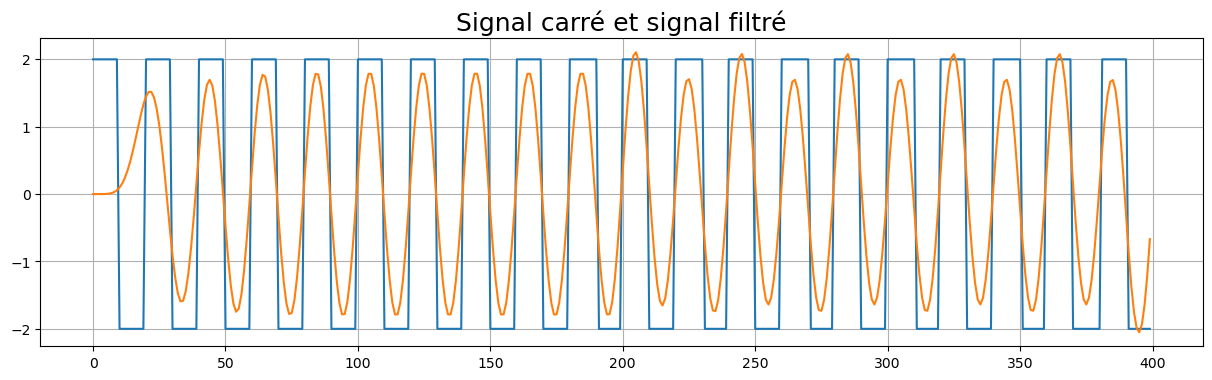

In [18]:
fig, ax = plt.subplots(figsize = (15, 4))

#Affichage du module de la fonction de transfert h du filtre sur l'axe 0
ax.plot(signal)
ax.plot(filtered)
ax.grid()
#ax[0].set_xlim([10,1e4])
#ax[0].set_ylim([-0.1,1.1])
ax.set_title('Signal carré et signal filtré', fontsize=18)